In [1]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]


In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = X[36000]

In [8]:
some_digit_image=some_digit.reshape(28,28)

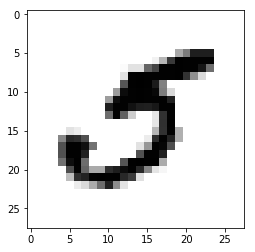

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")

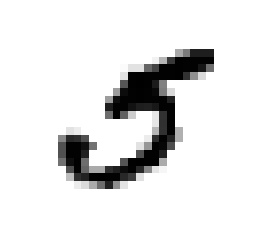

In [10]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[36000]

5.0

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
y_train

array([0., 0., 0., ..., 9., 9., 9.])

In [15]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [16]:
shuffle_index

array([55168, 12903, 34804, ..., 16639,  5636, 55435])

In [17]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

c:\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

In [21]:
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)

In [22]:
c1 = V.T[:, 0]
c2 = V.T[:, 1]

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 154)

In [24]:
X_mnist_reduced = pca.fit_transform(X)
X_mnist_recovered=pca.inverse_transform(X_mnist_reduced)

In [25]:
X_mnist_recovered.shape

(70000, 784)

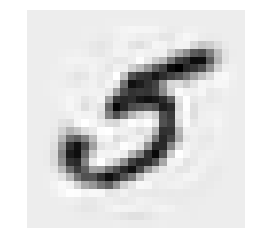

In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_Im = X_mnist_recovered[36000]
some_digit_image=some_digit_Im.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [27]:
X_mnist_np=np.round(X_mnist_recovered * 4, 0) / 4.0 

In [28]:
X_mnist_np.shape

(70000, 784)

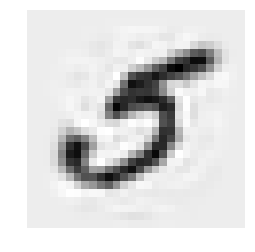

In [29]:
some_digit_Im = X_mnist_np[36000]
some_digit_image=some_digit_Im.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [30]:
help(np.round)

Help on function round_ in module numpy.core.fromnumeric:

round_(a, decimals=0, out=None)
    Round an array to the given number of decimals.
    
    Refer to `around` for full documentation.
    
    See Also
    --------
    around : equivalent function



In [31]:
help(pca.fit_transform)

Help on method fit_transform in module sklearn.decomposition.pca:

fit_transform(X, y=None) method of sklearn.decomposition.pca.PCA instance
    Fit the model with X and apply the dimensionality reduction on X.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : Ignored.
    
    Returns
    -------
    X_new : array-like, shape (n_samples, n_components)

